# Time Series Forecasting using Prophet
Implementacao em Python para previsão em séries temporais utilizando a API Prophet do Facebook.



## Objetivo
* Encontrar anomalias usando a API **Prophet** do Facebook.

* O modelo é decomposto em 3 componentes principais:

> 1. **Tendências** (g(t) - mudanças não periódicas)
> 2. **Sazonalidade** (s(t) - mudanças periódicas (semanal, anual))
> 3. **Feriados** (h(t))

> Combinados na equação: y(t) = g(t) + s(t) + h(t) + et, onde et é o termo de erro.





## Vantagens
* **Flexibilidade**: Acomoda facilmente sazonalidade com múltiplos períodos.
* **ARIMA**: os dados medidos não precisam ser esparçados regularmente e não precisa tratar dados faltantes ou remover outliers.

## Referências


*  **Arima**: https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Time%20Series%20Forecastings.ipynb
*  **Facebook Prophet**: https://facebook.github.io/prophet/docs/quick_start.html
* **Githut Prophet**: https://github.com/facebook/prophet
* **Forecasting at Scale**: https://peerj.com/preprints/3190.pdf



## Setup

Instalação de libraries

* **Numpy**: scientific computing
* **Seaborn**: visualização de dados estatisticos
* **PyDrive**: conexão Google Drive API
* **Fbprophet**: previsão de séries temporais que têm múltiplas sazonalidades com crescimento linear e não-linear.

In [0]:
!pip install numpy
!pip install seaborn
!pip install xlrd
!pip install -U -q PyDrive
!pip install fbprophet

In [0]:
import warnings
import itertools
import xlrd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns
from __future__ import division

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## Autenticação Google Drive

Importa todas as funções e variáveis do modulo **os**. Demais são imports específicos dos respectivos módulos.

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Autentica e cria um cliente PyDrive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Leitura Arquivo de Entrada

In [0]:
# Download from: https://community.tableau.com/docs/DOC-1236
data = drive.CreateFile({'id': '1l9GN-3PodTLFB4cHONIHSRKS54iYjn2o'})
data.GetContentFile('Superstore.xls')

In [0]:
df  =  pd.read_excel("Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']


## Prophet

In [16]:
# Phophet: API para forecasting do Facebook
# Referencia: https://facebook.github.io/prophet/docs/quick_start.html
# https://research.fb.com/prophet-forecasting-at-scale/
# Input: sempre um dataframe com duas colunas (ds - datestamp e y - numerico com o que esta sendo previsto)
from fbprophet import Prophet

furniture.head()
furniture = furniture.rename(columns={"Order Date":"ds", "Sales":"y"})
# set the uncertainty interval to 95% (the Prophet default is 80%)
m = Prophet(interval_width=0.95)
m.fit(furniture)

future = m.make_future_dataframe(periods=48, freq='MS')
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2164,2021-08-01,175.252131,-854.495887,1111.187646
2165,2021-09-01,289.099458,-630.284996,1294.737992
2166,2021-10-01,216.796521,-728.025297,1203.005336
2167,2021-11-01,313.511305,-659.013158,1299.191795
2168,2021-12-01,310.146218,-688.190293,1250.793483


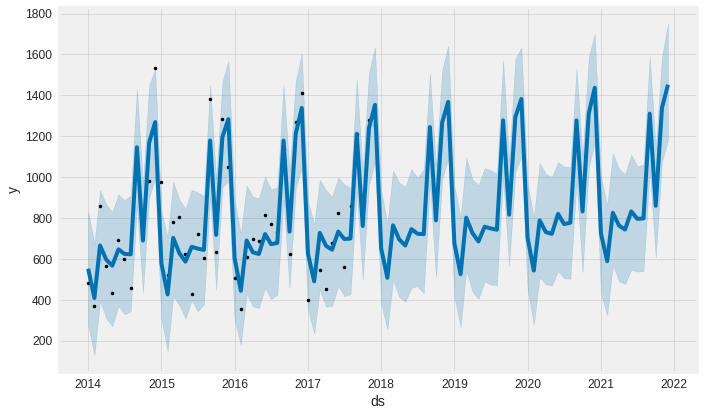

In [0]:
# Pontos pretos: valores observados da serie temporal
# Linha azul: valores estimados e intervalos de incerteza em azul claro
fig1 = m.plot(forecast, uncertainty=True)

In [0]:
# O plote de tendência mostra uma tendência linear de crescimento ao longo do tempo
# Parametros do dataframe:
# - yhat: valores estimados do valor y
# - yhat_lower: limiar inferior da estimativa
# - yhat_upper: limiar superior da estimativa
# - trend_lower: limiar inferior da estimativa
# - trend_upper: limiar superior da estimativa

fig2 = m.plot_components(forecast)

forecast